In [6]:
from pyvis.network import Network
import networkx as nx
import numpy as np
from utils import build_nx_graph
import pandas as pd

In [49]:
A = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])

A

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

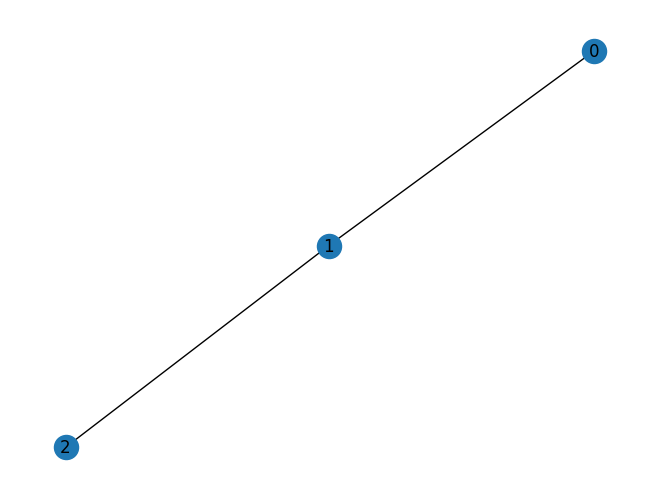

In [50]:
G = nx.from_numpy_array(A)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)

In [51]:
Q = np.array([
    [-1, 2, 0],
    [0, -1, 2],
    [0, 0, -1],
])

Q

array([[-1,  2,  0],
       [ 0, -1,  2],
       [ 0,  0, -1]])

$A = \left( \begin{array}{rrr}
0 & 1 & 0 \\ 
1 & 0 & 1 \\
0 & 1 & 0 \\
\end{array}\right)$


$Q = \left( \begin{array}{rrr}
-1 & 2 & 0 \\ 
0 & -1 & 2 \\
0 & 0 & -1 \\
\end{array}\right)$

$x = \left( \begin{array}{rrr}
0 & 0 & 1 \\
\end{array}\right)$

$\begin{document}
\[
H = \left( \begin{array}{rrr}
0 & 0 & 1 \\
\end{array}\right) \\ 
\left( \begin{vector}{rrr}
-1 & 2 & 0 \\ 
0 & -1 & 2 \\
0 & 0 & -1 \\
\end{vector}\right)
\]
\end{document}$

In [62]:
xs = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
])

for x in xs:
    H = x.T @ Q @ x
    print(x, H)

[0 0 0] 0
[0 0 1] -1
[0 1 0] -1
[0 1 1] 0
[1 0 0] -1
[1 0 1] -2
[1 1 0] 0
[1 1 1] 1


In [58]:
x = np.array([0, 0, 0])

x.T @ Q @ x

0

In [39]:
x @ Q

array([-1,  1,  4,  2])